In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from catboost import Pool
from sklearn.metrics import r2_score

In [2]:
tab_raw = pd.read_csv("2022_Test_ML.csv")

In [3]:
tab_raw["d1"] = tab_raw["d"].apply(lambda x: int(2*x))
tab_raw["d2"] = 2*tab_raw["d"] - tab_raw["d1"]
tab_raw["h_p_inverse"] = 1/tab_raw["h_p"]

In [4]:
del tab_raw["ind"]
del tab_raw["s_mt"]
del tab_raw["s_mq"]

In [5]:
def calculate_approximation_and_generalization_errors(tab_raw, n):
    tab = tab_raw.sample(n, random_state = 239)
    print(len(tab))
    tab_res = tab[["QW", "DP"]]
    del tab["QW"]
    del tab["DP"]
    X_full, X_test, y_full, y_test = train_test_split(tab, tab_res, random_state=239, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, random_state=239, test_size=0.2)
    model_qw = CatBoostRegressor(use_best_model=True, eval_metric="R2", verbose=False)
    model_dp = CatBoostRegressor(use_best_model=True, eval_metric="R2", verbose=False)
    model_qw.fit(X_train, y_train["QW"], eval_set=Pool(data=X_val, label=y_val["QW"]))
    model_dp.fit(X_train, y_train["DP"], eval_set=Pool(data=X_val, label=y_val["DP"]))
    preds_train_qw = model_qw.predict(X_train)
    preds_val_qw = model_qw.predict(X_val)
    preds_test_qw = model_qw.predict(X_test)
    preds_train_dp = model_dp.predict(X_train)
    preds_val_dp = model_dp.predict(X_val)
    preds_test_dp = model_dp.predict(X_test)
    res = []
    res.append(r2_score(preds_train_qw, y_train["QW"]))
    res.append(r2_score(preds_val_qw, y_val["QW"]))
    res.append(r2_score(preds_test_qw, y_test["QW"]))
    res.append(r2_score(preds_train_dp, y_train["DP"]))
    res.append(r2_score(preds_val_dp, y_val["DP"]))
    res.append(r2_score(preds_test_dp, y_test["DP"]))
    print(res)
    return res

In [6]:
res_total = []
for size in range(100, len(tab_raw)+1, 50):
    res = calculate_approximation_and_generalization_errors(tab_raw, size)
    res.append(size)
    res_total.append(res.copy())

100
[0.9995654803950644, 0.1428834387953526, 0.316581403286718, 0.9999699241705627, 0.8183167558879838, 0.9387127979858361]
150
[0.9997493228394746, 0.19342439223763763, 0.8200479247352476, 0.9999487000722809, 0.9666277731402174, 0.9590923568852202]
200
[0.9993790307665801, 0.943074136140872, 0.935255595379235, 0.9999143308337636, 0.9717442828339374, 0.9803054314886271]
250
[0.9990943926068497, 0.914268549314991, 0.8586170142812262, 0.9998632101841947, 0.9831367363265574, 0.9812664946908124]
300
[0.9987627947695942, 0.8793740822473626, 0.891070140531272, 0.9998429237447788, 0.975047654575702, 0.9614521233604447]
350
[0.9986924329632841, 0.9367592133135448, 0.8998971989559869, 0.9997531500225698, 0.991768989715, 0.9526691877386981]
400
[0.9990273051087547, 0.9518998840127507, 0.9287834983323277, 0.999811592478795, 0.9899714206981776, 0.9659573645407041]
450
[0.9986615876636797, 0.9415584876184563, 0.9487754219397027, 0.9997840408327044, 0.9674493323616803, 0.9769783928981012]
500
[0.998

In [7]:
res_total

[[0.9995654803950644,
  0.1428834387953526,
  0.316581403286718,
  0.9999699241705627,
  0.8183167558879838,
  0.9387127979858361,
  100],
 [0.9997493228394746,
  0.19342439223763763,
  0.8200479247352476,
  0.9999487000722809,
  0.9666277731402174,
  0.9590923568852202,
  150],
 [0.9993790307665801,
  0.943074136140872,
  0.935255595379235,
  0.9999143308337636,
  0.9717442828339374,
  0.9803054314886271,
  200],
 [0.9990943926068497,
  0.914268549314991,
  0.8586170142812262,
  0.9998632101841947,
  0.9831367363265574,
  0.9812664946908124,
  250],
 [0.9987627947695942,
  0.8793740822473626,
  0.891070140531272,
  0.9998429237447788,
  0.975047654575702,
  0.9614521233604447,
  300],
 [0.9986924329632841,
  0.9367592133135448,
  0.8998971989559869,
  0.9997531500225698,
  0.991768989715,
  0.9526691877386981,
  350],
 [0.9990273051087547,
  0.9518998840127507,
  0.9287834983323277,
  0.999811592478795,
  0.9899714206981776,
  0.9659573645407041,
  400],
 [0.9986615876636797,
  0.9415

In [8]:
res_frame = pd.DataFrame(res_total, columns=["qw_train", "qw_val", "qw_test", "dp_train", "dp_val", "dp_test", "sample_size"])
res_frame["line"] = 0.9

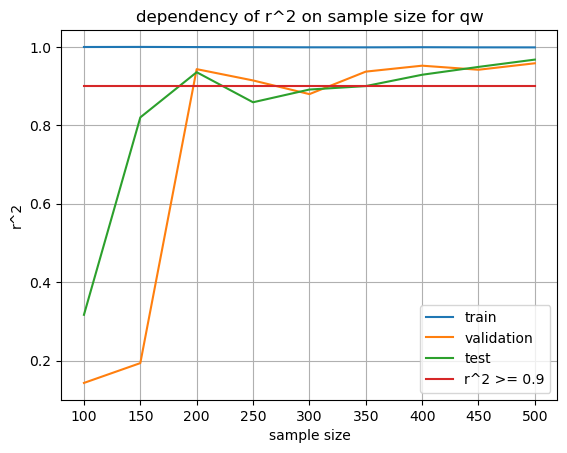

In [9]:
plt.plot(res_frame["sample_size"], res_frame["qw_train"], label="train")
plt.plot(res_frame["sample_size"], res_frame["qw_val"], label="validation")
plt.plot(res_frame["sample_size"], res_frame["qw_test"], label="test")
plt.plot(res_frame["sample_size"], res_frame["line"], label="r^2 >= 0.9")
plt.xlabel("sample size")
plt.ylabel("r^2")
plt.grid()
plt.title("dependency of r^2 on sample size for qw")
plt.legend()

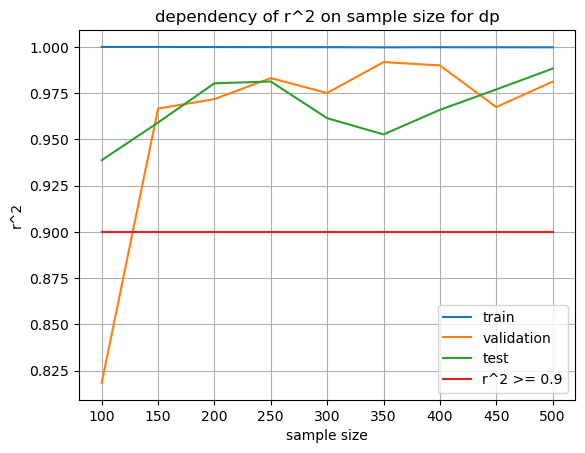

In [10]:
plt.plot(res_frame["sample_size"], res_frame["dp_train"], label="train")
plt.plot(res_frame["sample_size"], res_frame["dp_val"], label="validation")
plt.plot(res_frame["sample_size"], res_frame["dp_test"], label="test")
plt.plot(res_frame["sample_size"], res_frame["line"], label="r^2 >= 0.9")
plt.xlabel("sample size")
plt.ylabel("r^2")
plt.grid()
plt.title("dependency of r^2 on sample size for dp")
plt.legend()

Conclusions.

1. The boosting model for QW works fine starting from sample size of 200.

2. The boosting model for DP works fine starting from sample size of 150.

3. We mean sample size of the whole dataset (train + val + test).

4. It is not a surprise, since if we have few data, we should consider other methods (linear models, random forests, etc.).